<a href="https://colab.research.google.com/github/AnastTF/Regression_laser_Speed/blob/main/Regression_laserSpeed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

coeffKorr:                    | -0.909169668011678
Коэффициент детерминации:     | 0.9727204195670528
Mean Abcolute Error:          | 0.0014357867090584973
Mean Squared Error:           | 3.7009872194990063e-06
Root Mean Squared Error:      | 0.0019237950045415458
Сравнение фактических выходных значений 
для тестовых данных с прогнозируемыми значениями: 
      Actual  Predicted
0   0.090078   0.087635
1   0.056300   0.056662
2   0.078281   0.079096
3   0.084983   0.087542
4   0.059000   0.061627
..       ...        ...
65  0.065100   0.063952
66  0.072500   0.071671
67  0.080182   0.080133
68  0.098333   0.101298
69  0.084776   0.084550

[70 rows x 2 columns]


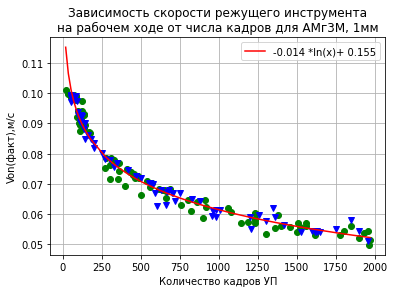

In [ ]:
#импортируем библиотеки pandas, numpy и matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_excel("/content/Зависимости для АМг3М 1мм_1.xls")#открытие файла с названием "значение скорости для АМг3М толщиной 1мм.xls" и импортируем данные из этого файла 
#print(data.shape)#количество колонок и столбцов таблицы
#print(data.head())#выводит первые 5 строк таблицы

#подготовка данных
#извлекаем данные
x=data.iloc[:,:-1].values#столбец количество кадров
y=data.iloc[:,1].values#столбец значений рабочей скорости режущего инструмента для соответствующего значения количества кадров

#вычислим коэффициент корреляции
coeffKorr=data['Количество кадров'].corr(data['Значение рабочей скорости, м/с'])

#разделяем данные на тестовые и обучающие
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=0)#разбиваем данные на 80% - обучающие, 20% - тестовые

#'обучаем' алгоритм с использованием метода наименьших квадратов - МНК
from sklearn.linear_model import LinearRegression
model=LinearRegression()#вычисляем оптимальные значения весов
z=model.fit(np.log(x_train),y_train)
#print(z.intercept_)#значение коэффициента b аппроксимирующей функции y=a*ln(x)+b
#print(z.coef_)#значение коэффициента a аппроксимирующей функции y=a*ln(x)+b

# Для сравнения качества делаем прогноз и на тех данных, на которых обучались
z_train = model.predict(np.log(x_train))
z_test = model.predict(np.log(x_test))
#делаем прогнозы по модели по тестовым данным
y_pred=model.predict(np.log(x_test))
#сравниваем фактические выходные значения для x_test с прогнозируемыми значениями
df=pd.DataFrame({'Actual':y_test,'Predicted': y_pred})

#оценка алгоритма
from sklearn import metrics
#найдем коэффициент детерминации
r_sq=model.score(np.log(x_train),y_train)
#найдем значение средней абсолютной ошибки-MAE(Mean Abcolute Error)
m_a_e=metrics.mean_absolute_error(y_test,y_pred)
#среднеквадратичной ошибки - MSE (Mean Squared Error)
m_s_e=metrics.mean_squared_error(y_test,y_pred)
#средняя квадратная ошибка - RMSE (Root Mean Squared Error)
r_m_s_e=np.sqrt(metrics.mean_squared_error(y_test,y_pred))

#значения для построения регрессирующей функции на графике
x_pr=[]
for row in x_train:
    for i in row:
        x_pr.append(i)
x_pr.sort()
x_pr=np.array(x_pr).reshape((-1,1))#переводим в двумерный массив
z_pr = model.predict(np.log(x_pr))

lab=str(round((*z.coef_),3))+' *ln(x)+ '+str(round(z.intercept_,3))
#ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ на графике с использованием библиотеки matplotlib    
plt.plot(x_train, y_train,color='green',marker='o',ls='')#marker-маркер точек, ls - стиль линии
plt.plot(x_test, y_test,color='blue',marker='v',ls='')
plt.plot(x_pr, z_pr,color='red',label=lab)
plt.title("Зависимость скорости режущего инструмента"+"\n"+"на рабочем ходе от числа кадров для АМг3М, 1мм")#ВВЕДИТЕ название в соответствии с вашими данными
plt.xlabel("Количество кадров УП")
plt.ylabel("Von(факт),м/с")
plt.grid()
plt.legend()

#Выводим результаты
   
print('='*20)
print("coeffKorr:"+' '*(len('Коэффициент детерминации:')-5)+'|',coeffKorr)
print('Коэффициент детерминации:'+' '*5+'|',r_sq)
print('Mean Abcolute Error:'+' '*10+'|',m_a_e)
print('Mean Squared Error:'+' '*11+'|',m_s_e)
print('Root Mean Squared Error:'+' '*6+'|',r_m_s_e)
print('='*20)
print('Сравнение фактических выходных значений \nдля тестовых данных с прогнозируемыми значениями: ')
print(df)
print('='*20)


# Новый раздел